In [49]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Question 1:

In [55]:
# Obtaining necessary data

FederalData = pd.read_csv('C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW3\\Sdf16_1a.txt',sep="\t")

MathData = pd.read_csv('C:\\Users\\saich\\Desktop\\Information Visualization Proj\\HW3\\math-achievement-lea-sy2015-16.csv',sep=',')

C:\Users\saich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\saich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
FederalData = FederalData[FederalData.TFEDREV.notnull()]
FederalData = FederalData[FederalData.V33.notnull()]
FederalData = FederalData[FederalData.TFEDREV >= 0]
FederalData = FederalData[FederalData.V33 >= 0]

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
6,100011,01503710100000,1,01073,142,13820,Leeds City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


In [31]:
# Grouping by state name and summing up fed revenue and sorting in reverse 

FederalDataSub = FederalData.filter(['TFEDREV','STNAME','V33','LEAID'], axis=1)
FederalData_top = FederalDataSub.groupby(['STNAME']).sum().sort_values(by='TFEDREV', ascending=False).reset_index()

In [32]:
# What are the top ranking states

FederalData_top.head(5)

,STNAME,TFEDREV,V33
0,California,7621532000,6203660
1,Texas,5907429000,5299728
2,New York,3362525000,2591989
3,Florida,3147329000,2776933
4,Illinois,2122994000,2030075


In [39]:
# What is the funding per student

FederalData_top['FedFundPerStudent'] = FederalData_top['TFEDREV']/FederalData_top['V33']
FederalData_topState = FederalData_top.sort_values(by='FedFundPerStudent', ascending=False).reset_index()

In [40]:
FederalData_topState.head(5)

,index,STNAME,TFEDREV,V33,FedFundPerStudent
0,41,District of Columbia,224326000,82974,2703.569793
1,38,Alaska,307320000,132477,2319.798908
2,12,Louisiana,1115619000,717223,1555.470195
3,30,New Mexico,516289000,335316,1539.708812
4,43,South Dakota,196644000,134045,1466.999888


<Figure size 1080x432 with 0 Axes>

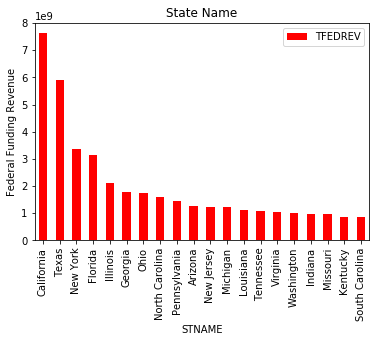

In [37]:
# Plotting federal funding revenue 
plt.figure(figsize=(15,6))
FederalData_top[:20].plot(kind='bar', y='TFEDREV', x='STNAME',color='red')
plt.ylabel("Federal Funding Revenue")
plt.title('State Name')
plt.show()

In [ ]:
# Plotting federal funding per student 
plt.figure(figsize=(15,6))
FederalData_topState[:20].plot(kind='bar', y='FedFundPerStudent', x='STNAME',color='red')
plt.ylabel("Federal Funding per student")
plt.title('State Name')
plt.show()

In [43]:
# Question 2:

# Subsetting required rows
FederalDataState = FederalData.filter(['TOTALEXP','TOTALREV','STNAME','V33','LEAID'], axis=1)

In [44]:
# Sorting 

FederalDataState= FederalDataState[(FederalDataState[['TOTALEXP']] >= 0).all(axis=1)]
FederalDataState = FederalDataState[(FederalDataState[['TOTALREV']] >= 0).all(axis=1)]
FederalDataStateSum = FederalDataState.groupby(['LEAID'],as_index=False).sum().sort_values(by='TOTALREV', ascending=False)

In [45]:
FederalDataStateSum.head(5)

,LEAID,TOTALEXP,TOTALREV,V33
11903,3620580,29620098000,27448356000,981667
1577,622710,9686165000,10329380000,639337
8764,1709930,5963039000,5272668000,387311
8163,1200390,3654722000,3590773000,357579
4965,3200060,3081183000,3220684000,325990


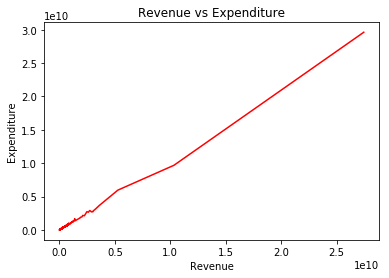

In [47]:
plt.plot(FederalDataStateSum['TOTALREV'],FederalDataStateSum['TOTALEXP'],COLOR = 'RED')
plt.ylabel('Expenditure')
plt.xlabel('Revenue')
plt.title('Revenue vs Expenditure')
plt.show()

In [50]:
FederalDataState1=FederalDataState.groupby(['STNAME'],as_index=False).sum().sort_values(by='TOTALREV', ascending=False)
FederalDataState1['DEBT_PERSTUDENT']=np.subtract(FederalDataState1['TOTALEXP'],FederalDataState1['TOTALREV'])/FederalDataState1['V33']
FederalDataState1=FederalDataState1.sort_values(by='DEBT_PERSTUDENT',axis=0, ascending=False)

,STNAME,TOTALEXP,TOTALREV,V33,DEBT_PERSTUDENT
34,North Dakota,1882441000,1709502000,108384,1595.613744
8,District of Columbia,2232976000,2121210000,82974,1347.000265
1,Alaska,2623014000,2494691000,132477,968.643614
27,Nebraska,4550257000,4309417000,315542,763.258140
23,Minnesota,12925061000,12381121000,862013,631.011365


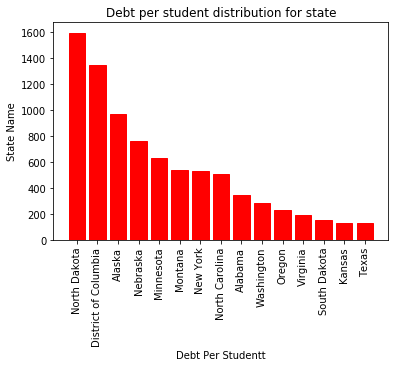

In [54]:
plt.bar(FederalDataState1['STNAME'][:15], FederalDataState1['DEBT_PERSTUDENT'][:15],COLOR = 'RED')
plt.ylabel('State Name')
plt.xlabel('Debt Per Studentt')
plt.title('Debt per student distribution for state')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Question 3:

C:\Users\saich\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


AttributeError: 'NoneType' object has no attribute 'update'

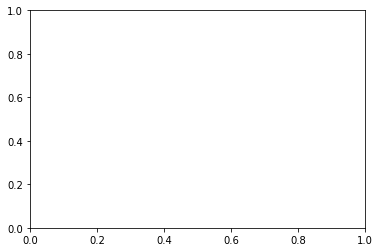

In [68]:
def DeBlurringFunction(Dataset, ColumnName):
    # Getting values from the required column
    contents = Dataset[ColumnName].astype(str)
    for value in contents:
        if '-' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = np.mean([int(range_value) for range_value in value.split('-')])
        elif 'PS' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = np.nan
        elif r'nan' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = np.nan
        elif 'LT' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = ((int(value.split('LT')[1])-1)+0)/2
        elif 'GT' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = ((int(value.split('GT')[1])+1)+100)/2
        elif 'GE' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = ((int(value.split('GE')[1]))+100)/2
        elif 'LE' in value:
            Dataset[ColumnName].loc[Dataset[ColumnName] == value] = ((int(value.split('LE')[1]))+0)/2   
    #Dataset[ColumnName] = Dataset[ColumnName].astype(float)
    return Dataset


ProcessedData = DeBlurringFunction(MathData, 'MAM_MTH00PCTPROF_1516')
ProcessedColumn = ProcessedData['MAM_MTH00PCTPROF_1516']

n, bins, patches = plt.hist(ProcessedColumn, 15, facecolor='red')
plt.ylabel('Total no. of students')
plt.xlabel('Percentage Bins')
plt.title('Distribution of performance metric for math')
plt.show()

LEAID = []
amount = []
value = 0


In [63]:
# Question 4:

FederalDataSub4 = FederalData.filter(['TFEDREV','STNAME','LEAID','TOTALREV','TOTALEXP','TSTREV','TLOCREV'], axis=1)
HowMuchMoney = FederalDataSub4['TFEDREV'].sum()
FederalDataSub4['Extra'] = FederalDataSub4['TOTALREV'] - FederalDataSub4['TOTALEXP']
NeededRows = FederalDataSub4[FederalDataSub4['Extra']>=FederalDataSub4['TFEDREV']]

print(HowMuchMoney)
print(HowMuchMoney*0.15)

55602739138
8340410870.7


In [66]:
for j,k in NeededRows.iterrows(): 
    if value <= (HowMuchMoney*0.15):
        
        LEAID.append(k['LEAID'])
        
        amount.append(k['TFEDREV'])
        
        value = value + k['TFEDREV']

In [67]:
pd.DataFrame({'leaid': LEAID,'amount': amount}).sort_values('amount',ascending=False)

,amount,leaid
1327,261131000,1500030
2671,112717000,2400480
2527,102276000,2201170
3239,73019000,2680995
916,54822000,0638010
1089,50952000,0804800
3231,50172000,2680880
6399,45249000,4800211
680,44505000,613920
1989,42260000,1810290
